In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_table('LORENZ.DAT', header=None)

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
plt.plot(df[0:5000])

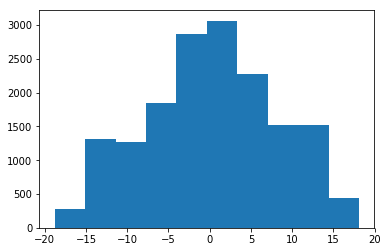

In [99]:
a = np.array(df).flatten()
counts, edges, img = plt.hist(a, bins=10)

In [100]:
# データが所属する場所の取得
bin_indices = np.digitize(a, edges)
discrete = a[bin_indices] #最頻値

In [92]:
counts

array([ 276., 1308., 1264., 1841., 2870., 3065., 2280., 1516., 1516.,
        448.])

In [88]:
test = []
for i in range(len(a)):
    test.append([a[i], bin_indices[i]])

In [93]:
test[0][1]

6

In [95]:
counts[test[0][1]]

2280.0

In [103]:
mi_list = []
t_list = []
#for t in range(1, 2):
mi = 0
t = 10
# ずらしたぶん最後のサンプルを削除
#unlagged = discrete[:-t]
#lagged = np.roll(discrete, -t)[:-t]
unlagged = a[:-t]
lagged = np.roll(a, -t)[:-t]

for i in range(len(unlagged)):
    p_ab = (lagged[i] * unlagged[i]) / (len(unlagged))
    p_a = lagged[i] / (len(unlagged))
    p_b = unlagged[i] / (len(unlagged))
    mi += p_ab * np.log2(p_ab / (p_a * p_b))
mi_list.append(mi)
t_list.append(t)

In [15]:
mi_list

[761.6088068396444]

In [ ]:
mi_list[0:10]

In [ ]:
plt.plot(t_list, mi_list)

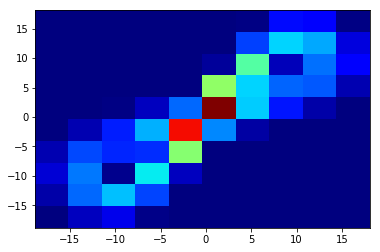

In [106]:
fig = plt.figure()
ax = fig.add_subplot(111)
counts, xedges, yedges, image = ax.hist2d(unlagged, lagged, bins=10, cmap=plt.cm.jet)

In [109]:
counts

array([[   2.,   63.,  131.,   75.,    5.,    0.,    0.,    0.,    0.,
           0.],
       [  96.,  390.,  411.,  335.,   76.,    0.,    0.,    0.,    0.,
           0.],
       [ 164.,  530.,   21.,  273.,  263.,   13.,    0.,    0.,    0.,
           0.],
       [  14.,  325.,  606.,  288.,  509.,   99.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,   95.,  870., 1515.,  384.,    6.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,  440., 1693.,  890.,   42.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,   56.,  554.,  568.,  767.,  320.,
          11.],
       [   0.,    0.,    0.,    0.,    6.,  245.,  378.,   89.,  564.,
         230.],
       [   0.,    0.,    0.,    0.,    0.,   63.,  362.,  401.,  493.,
         195.],
       [   0.,    0.,    0.,    0.,    0.,    4.,   76.,  217.,  139.,
          12.]])

### Ref
+ http://www.node99.org/tutorials/ar/
+ http://haretoke.hatenablog.jp/entry/2017/07/18/171819